In [1]:
#!pip install d2l==0.16.1
#!pip install -U mxnet-cu101==1.7.0


# Régression linéaire


In [2]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

## Génération des données




In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [4]:
true_w = np.array([2, 3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: [1.1630787 2.2122064] 
label: [14.0414715]


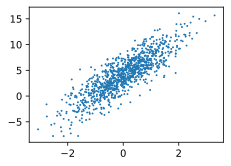

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1)

## Lire les données




In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

## Initialisation des paramètres


In [8]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()




## Modèle




In [9]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return np.dot(X, w) + b

## Fonction Loss



In [10]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## Algorithme du gradient




In [11]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## Entraînement



In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

In [13]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.044555
epoch 2, loss 0.000182
epoch 3, loss 0.000051


In [14]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [0.00053966 0.00055742]
error in estimating b: [0.00094891]


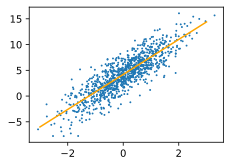

In [15]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1)
x=np.linspace(-3,3,100)
d2l.plt.plot(x,w[1]*x+b,color='orange')